In [6]:
# Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sc
from bokeh import __version__ as bk_version

pd.set_option("display.max_columns", None)

In [3]:
# Import the dataset

df = pd.read_csv("Dataset/freMTPL2freq.csv")

df["freq"] = df["ClaimNb"] / df["Exposure"]
df["LogDensity"] = np.log(df["Density"])

df.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,freq,LogDensity
count,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405,0.263964,5.981771
std,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564,4.593915,1.870453
min,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000,0.000000,0.000000
25%,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000,0.000000,4.521789
50%,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000,0.000000,5.973810
75%,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000,0.000000,7.413367
max,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000,732.000000,10.203592


In [5]:
# Creating the subset of data

random_subset = df.sample(n=20000)
subset_summary = random_subset.describe()

subset_summary

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,freq,LogDensity
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,2.615255e+06,0.053700,0.533307,6.465800,7.028800,45.560400,59.67350,1763.027450,0.232835,5.981266
std,1.631167e+06,0.238996,0.364446,2.041406,5.659591,14.156584,15.54073,3891.719567,2.778182,1.860888
min,3.200000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.00000,1.000000,0.000000,0.000000
25%,1.160494e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.00000,93.000000,0.000000,4.532599
50%,2.272610e+06,0.000000,0.500000,6.000000,6.000000,44.000000,50.00000,393.000000,0.000000,5.973810
75%,4.041333e+06,0.000000,1.000000,7.000000,11.000000,55.000000,64.00000,1622.000000,0.000000,7.391415
max,6.114307e+06,3.000000,1.480000,15.000000,99.000000,99.000000,166.00000,27000.000000,183.000000,10.203592


In [16]:
def plotBarCharts(data, x, ylimitFREQ, n=10):
    # Set Seaborn style and color palette
    sns.set_style("whitegrid")
    sns.set_palette("viridis")

    # Group data for both plots
    exposure_df = data.groupby(x, as_index=False).agg({'Exposure': 'sum'})
    freq_df     = data.groupby(x, as_index=False).agg({'freq': 'mean'})

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Exposure Bar Plot
    sns.barplot(x=x, y='Exposure', data=exposure_df, ax=axs[0])
    axs[0].set_xlabel(x, fontsize=12)
    axs[0].set_ylabel('Total Exposure', fontsize=12)
    axs[0].set_title(f"Exposure by {x}", fontsize=16, fontweight='bold')
    axs[0].tick_params(axis='x', labelsize=10, rotation=45)

    # Show only every n-th label on x-axis
    xticks = axs[0].get_xticklabels()
    for i, label in enumerate(xticks):
        if i % n != 0:
            label.set_visible(False)
    axs[0].set_xticklabels(xticks)

    # Annotate exposure bars
    for p in axs[0].patches:
        axs[0].annotate(f'{p.get_height():.0f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

    # Frequency Bar Plot
    sns.barplot(x=x, y='freq', data=freq_df, ax=axs[1])
    axs[1].set_xlabel(x, fontsize=12)
    axs[1].set_ylabel('Mean Frequency', fontsize=12)
    axs[1].set_title(f"Mean Frequency by {x}", fontsize=16, fontweight='bold')
    axs[1].set_ylim(0, ylimitFREQ)
    axs[1].tick_params(axis='x', labelsize=10, rotation=45)
    # Show only every n-th label on x-axis
    xticks = axs[1].get_xticklabels()
    for i, label in enumerate(xticks):
        if i % n != 0:
            label.set_visible(False)
    axs[1].set_xticklabels(xticks)

    # Annotate frequency bars
    for p in axs[1].patches:
        axs[1].annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.suptitle('Insurance Data Insights: Exposure & Frequency', fontsize=18, fontweight='bold', color='#444')
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()



# Data Exploration

### Explore each explanatory variable using subset data

### Keeping Frequency at 2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticks)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xticks)


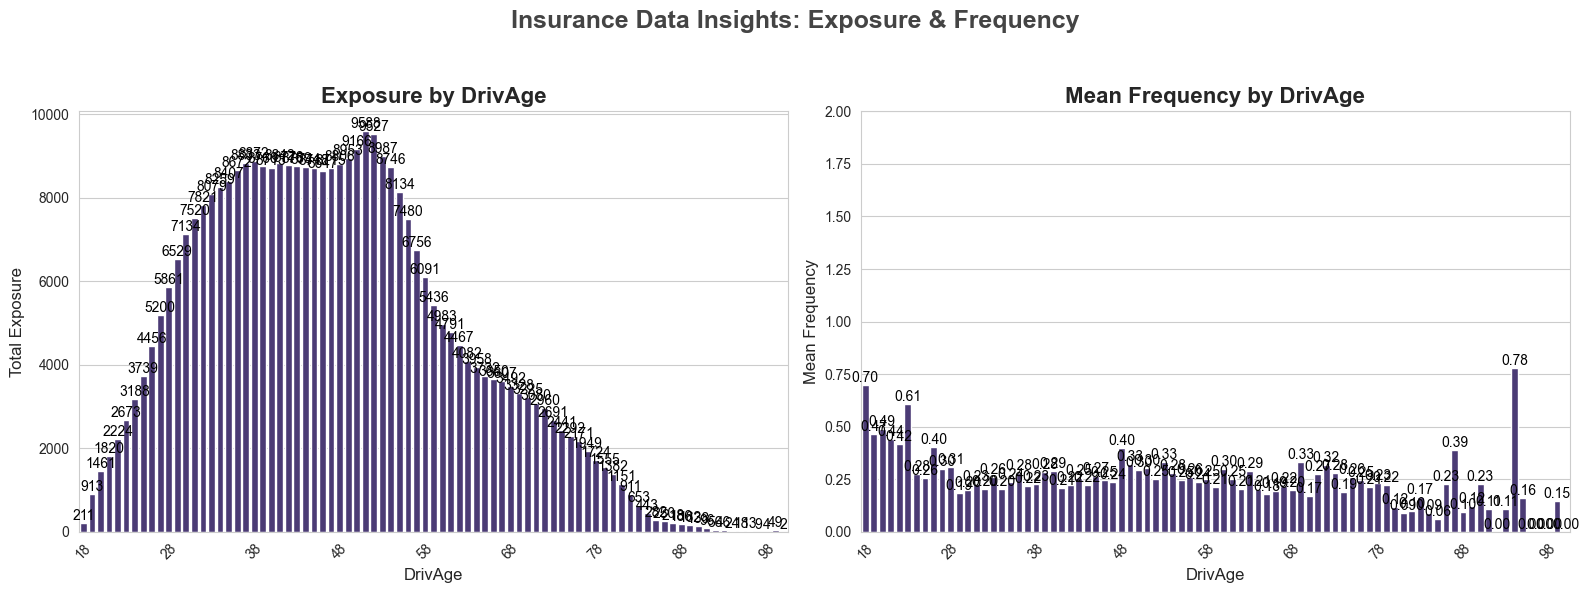

CPU times: total: 1.77 s
Wall time: 3.12 s


In [17]:
%%time

plotBarCharts(df, "DrivAge", 2)

In [18]:
# Exposure largely concentrated in age between ~28 to ~58

# Frequency in Most younder and most older ages of driver

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticks)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xticks)


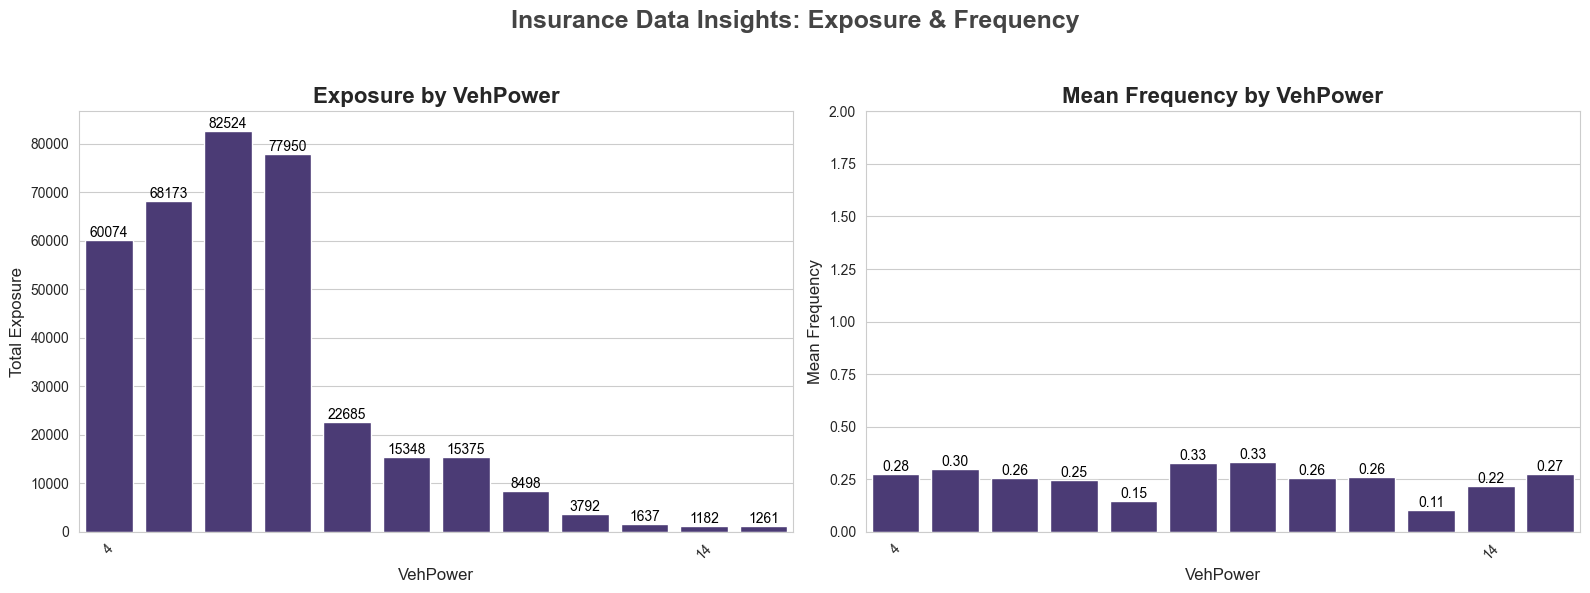

CPU times: total: 531 ms
Wall time: 2.24 s


In [19]:
%%time

plotBarCharts(df, "VehPower", 2)

In [20]:
# Vehicle with less power tends to have more Exposure

# Nothing noticable with Frequency in Power of Vehicle

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticks)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xticks)


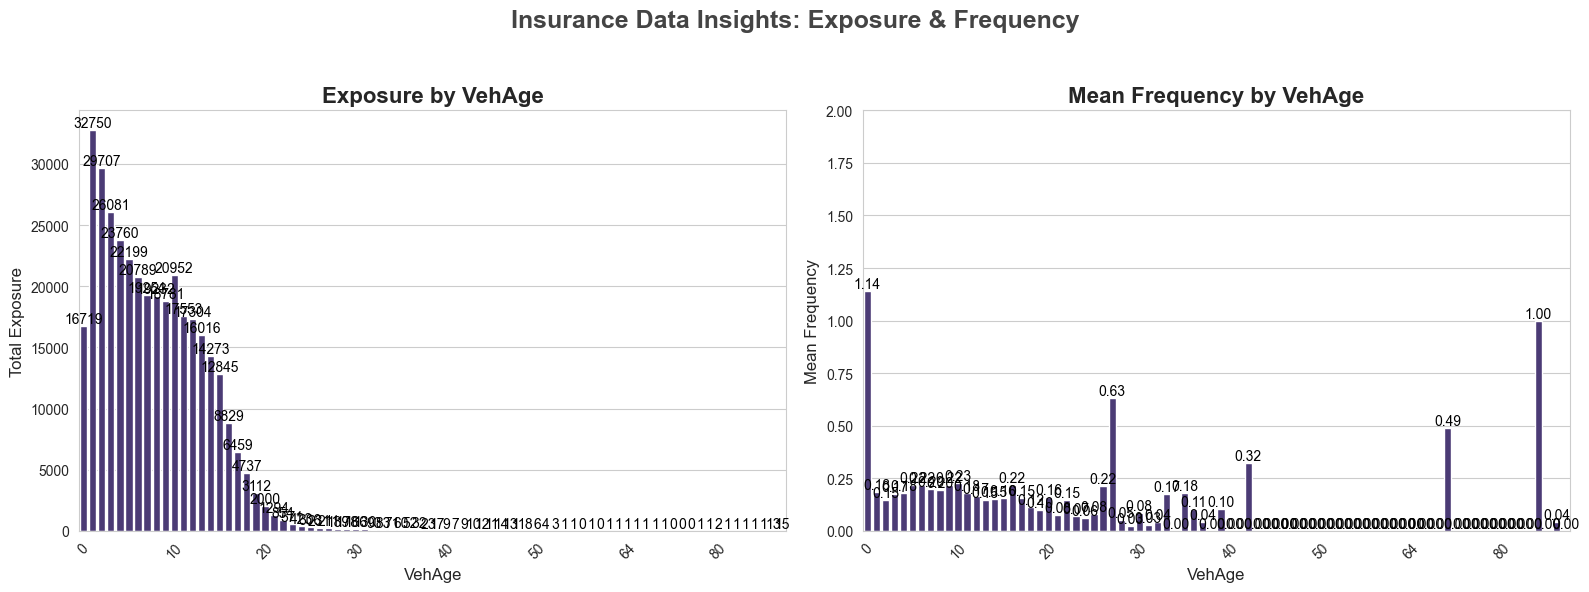

CPU times: total: 1.58 s
Wall time: 3.19 s


In [21]:
%%time

plotBarCharts(df, "VehAge", 2)

In [22]:
# At starting years of Vehicle, it tends to have more Exposure

# At Start 0, and at the end, Frequency is high

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(xticks)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1564\1406739234.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(xticks)


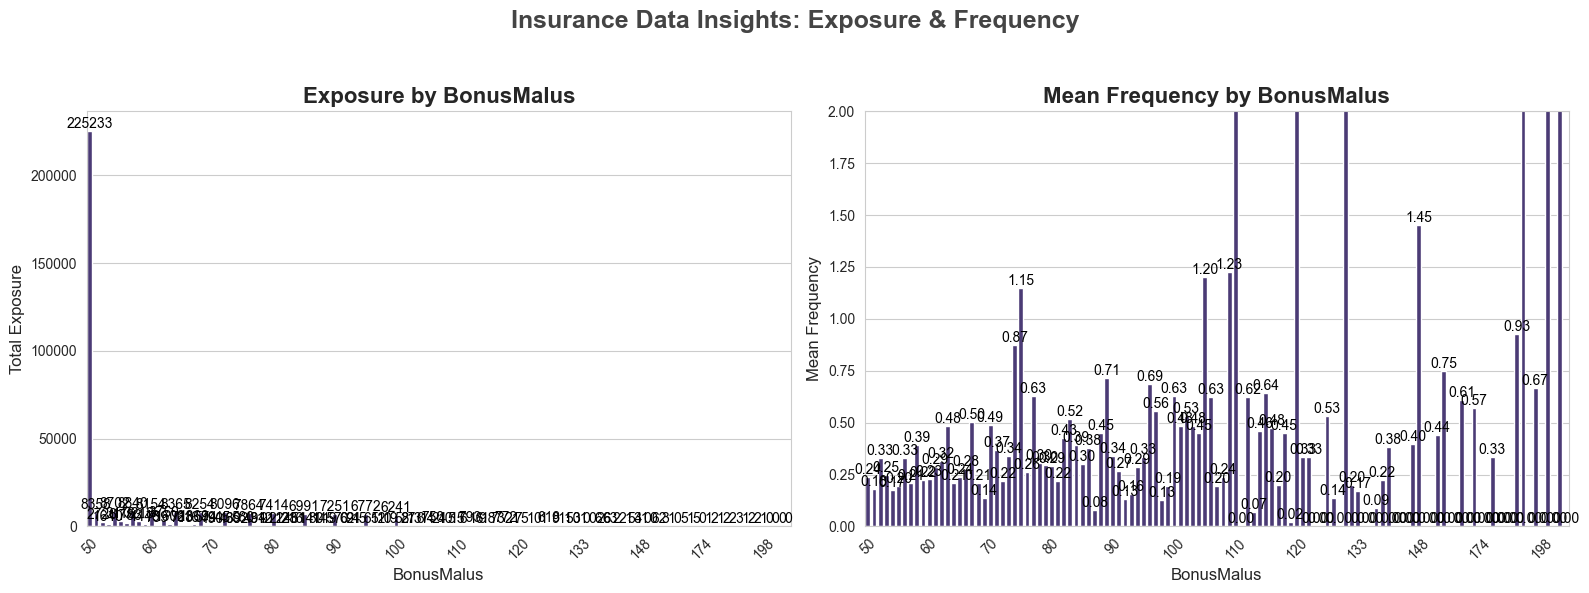

In [23]:
plotBarCharts(df, "BonusMalus", 2)